### Player Analysis ###

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import re

In [31]:
playerdata = pd.read_csv('data/Top5LeaguesPlayers_2223.csv', header=0, delimiter=',')
labels = pd.read_csv('data/Cluster_labels_2.csv', header=0, delimiter=',')
leaguerank = pd.read_csv('data/Top5LeaguesStandings.csv', header=0, delimiter=',')
playerdata['Cluster'] = labels
playerdata = playerdata[['Player', 'Squad', 'Position', 'Cluster']]

wage = pd.read_csv('data/Top5LeaguesPlayers_Wages.csv', header=0, delimiter=',')

playerdata = playerdata.merge(wage, 'left', 'Player')
playerdata = playerdata.dropna()

cluster_titles = ['Defensive Contributors', 'Dynamic Creators', 'Striking Forwards', 'Defensive Passers', 'Defensive Stoppers']

# Function to replace integers with corresponding strings
def int_to_string(val):
    return cluster_titles[val] if isinstance(val, int) and 0 <= val < len(cluster_titles) else val

# Apply the function to the entire DataFrame
playerdata = playerdata.map(int_to_string)

# playerdata

#### Pull out all players whose cluster is outside the majority for their position ####

In [32]:
# Calculate the most common cluster for each position
position_cluster_mode = playerdata.groupby('Position')['Cluster'].agg(lambda x: x.mode()[0])

# Identify players who do not belong to the most common cluster for their position
anomalous_players = playerdata[playerdata.apply(lambda row: row['Cluster'] != position_cluster_mode[row['Position']], axis=1)]
anomalous_players = anomalous_players[anomalous_players['Position'] != 'Not Found']
anomalous_players.reset_index(drop=True, inplace=True)

# Identify players who do not belong to the most common cluster for their position
typical_players = playerdata[playerdata.apply(lambda row: row['Cluster'] == position_cluster_mode[row['Position']], axis=1)]
typical_players = typical_players[typical_players['Position'] != 'Not Found']
typical_players.reset_index(drop=True, inplace=True)

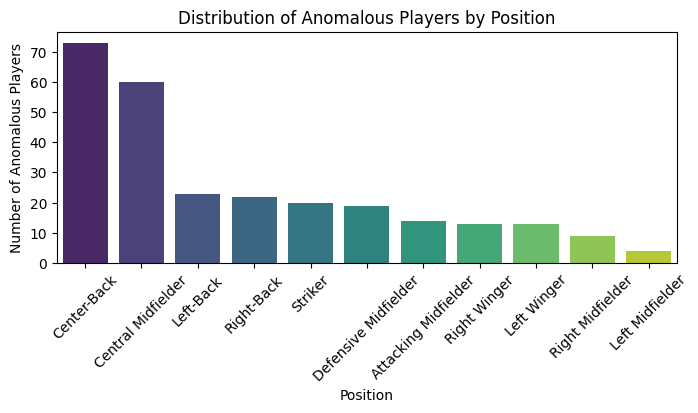

In [33]:
# Count anomalous players by position
position_counts = anomalous_players['Position'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 3))
sns.barplot(x=position_counts.index, y=position_counts.values, palette='viridis', hue=position_counts.index)
plt.title('Distribution of Anomalous Players by Position')
plt.xlabel('Position')
plt.ylabel('Number of Anomalous Players')
plt.xticks(rotation=45)
plt.show()

### Pay of players by cluster (Overall and within positions) ###

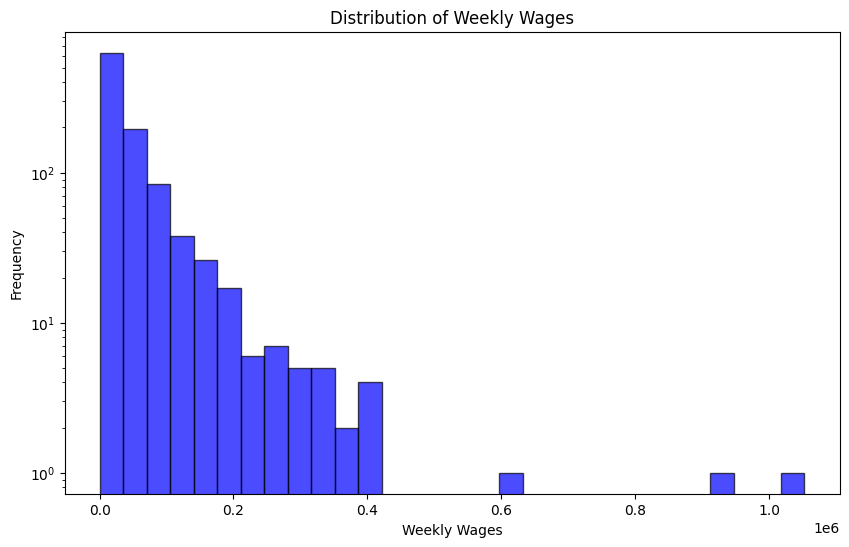

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(playerdata['Weekly Wages'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Weekly Wages')
plt.xlabel('Weekly Wages')
plt.ylabel('Frequency')
plt.yscale('log')

plt.show()

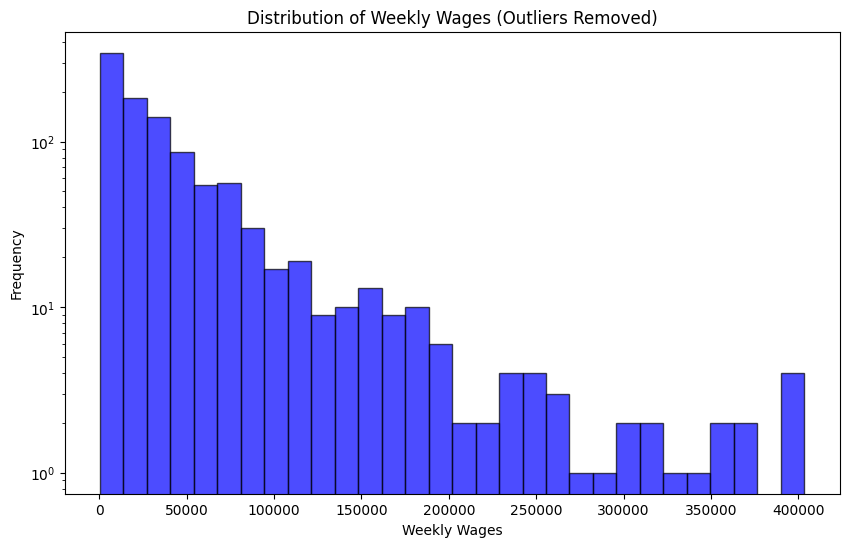

In [35]:
playerdata_filtered = playerdata[playerdata['Weekly Wages'] < 500000]

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(playerdata_filtered['Weekly Wages'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Weekly Wages (Outliers Removed)')
plt.xlabel('Weekly Wages')
plt.ylabel('Frequency')
plt.yscale('log')

plt.show()

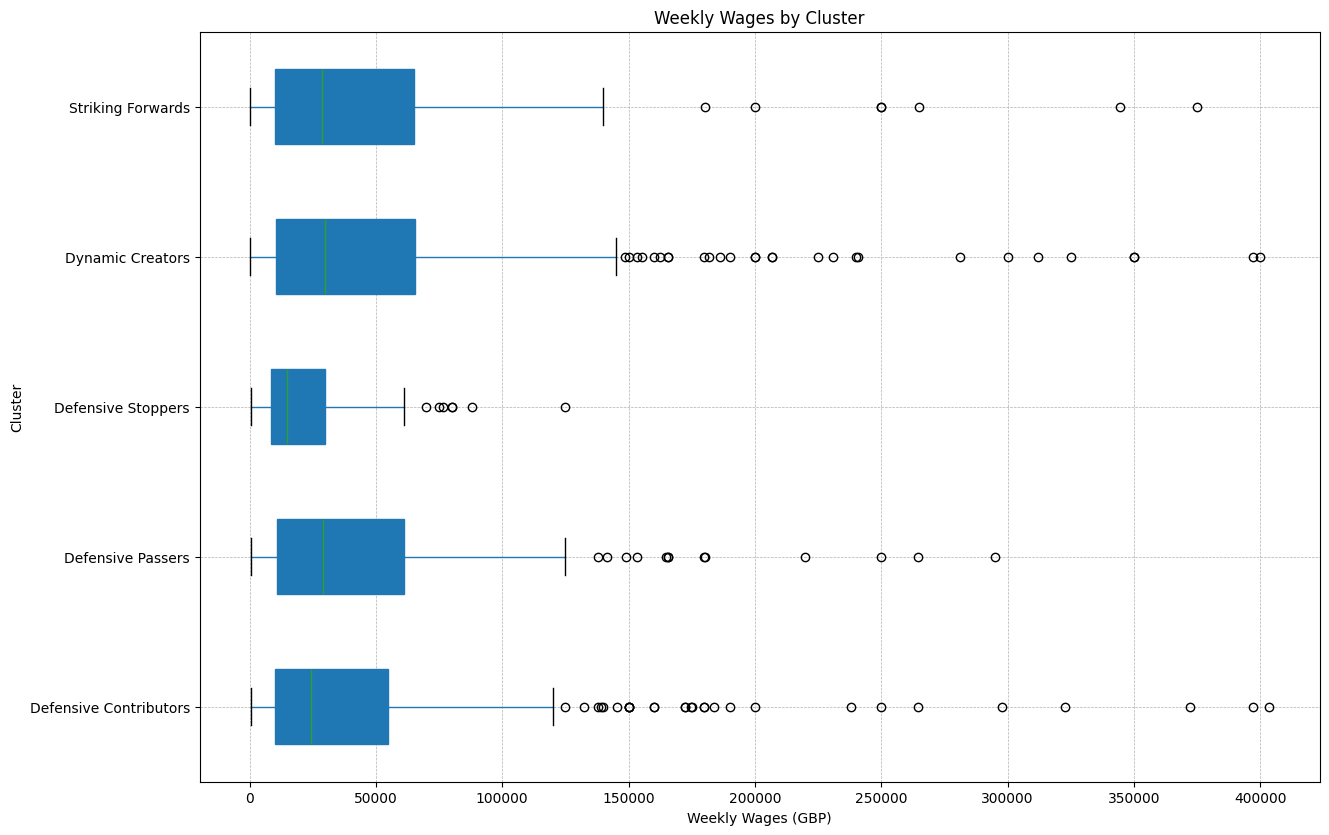

In [36]:
# Set the figure size
fig, ax = plt.subplots(figsize=(14,10))

# Create the box and whisker plots
playerdata_filtered.boxplot(column='Weekly Wages', by='Cluster', vert=False, patch_artist=True, ax=ax)

# Adjust titles and labels
plt.title('Weekly Wages by Cluster')
plt.suptitle('')
plt.xlabel('Weekly Wages (GBP)')
plt.ylabel('Cluster')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

Most common cluster for Full Backs: Defensive Contributors
Most common cluster for Wide Midfielders: Dynamic Creators
Most common cluster for Center Backs: Defensive Passers
Most common cluster for Wingers: Dynamic Creators
Most common cluster for Strikers: Striking Forwards
Most common cluster for Center Mids: Defensive Contributors
Most common cluster for Defensive Mids: Defensive Contributors
Most common cluster for Attacking Mids: Dynamic Creators


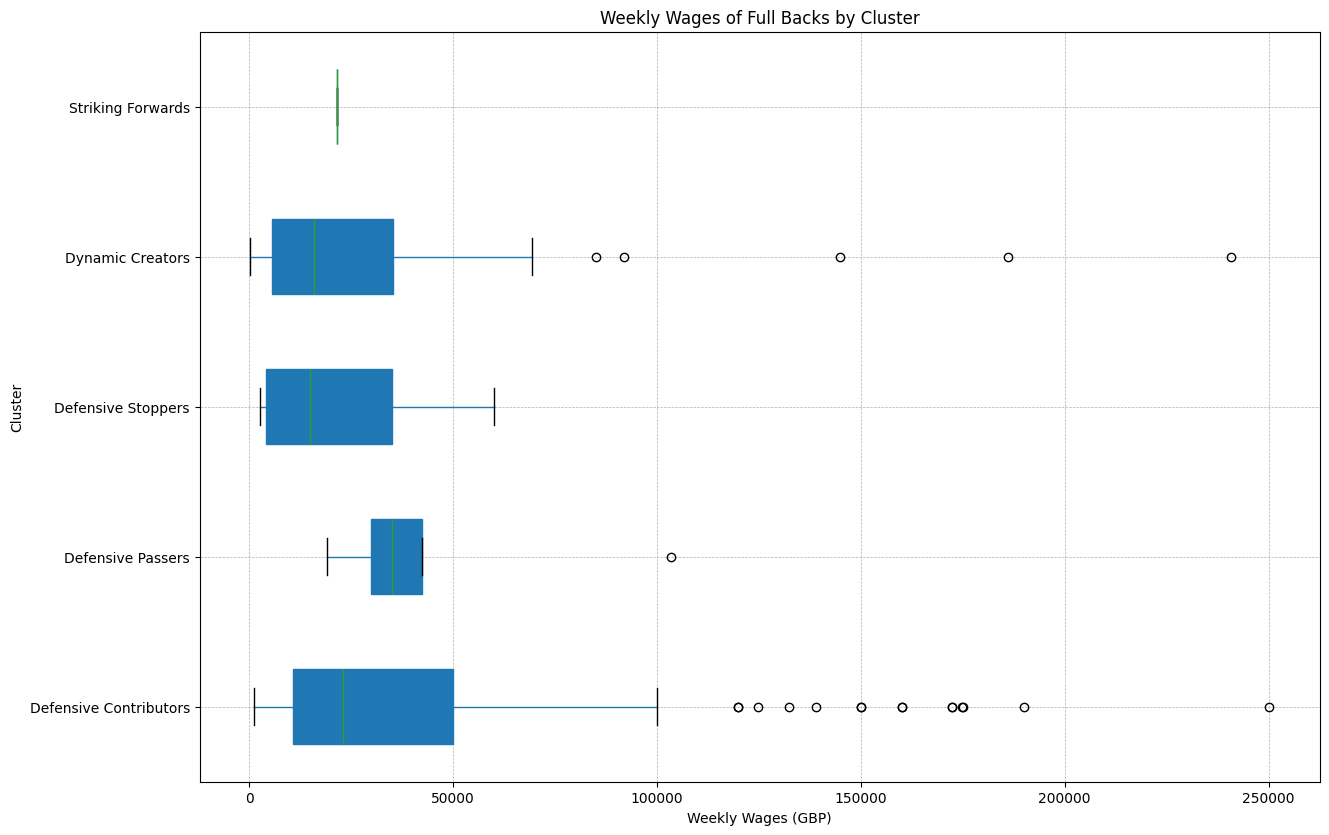

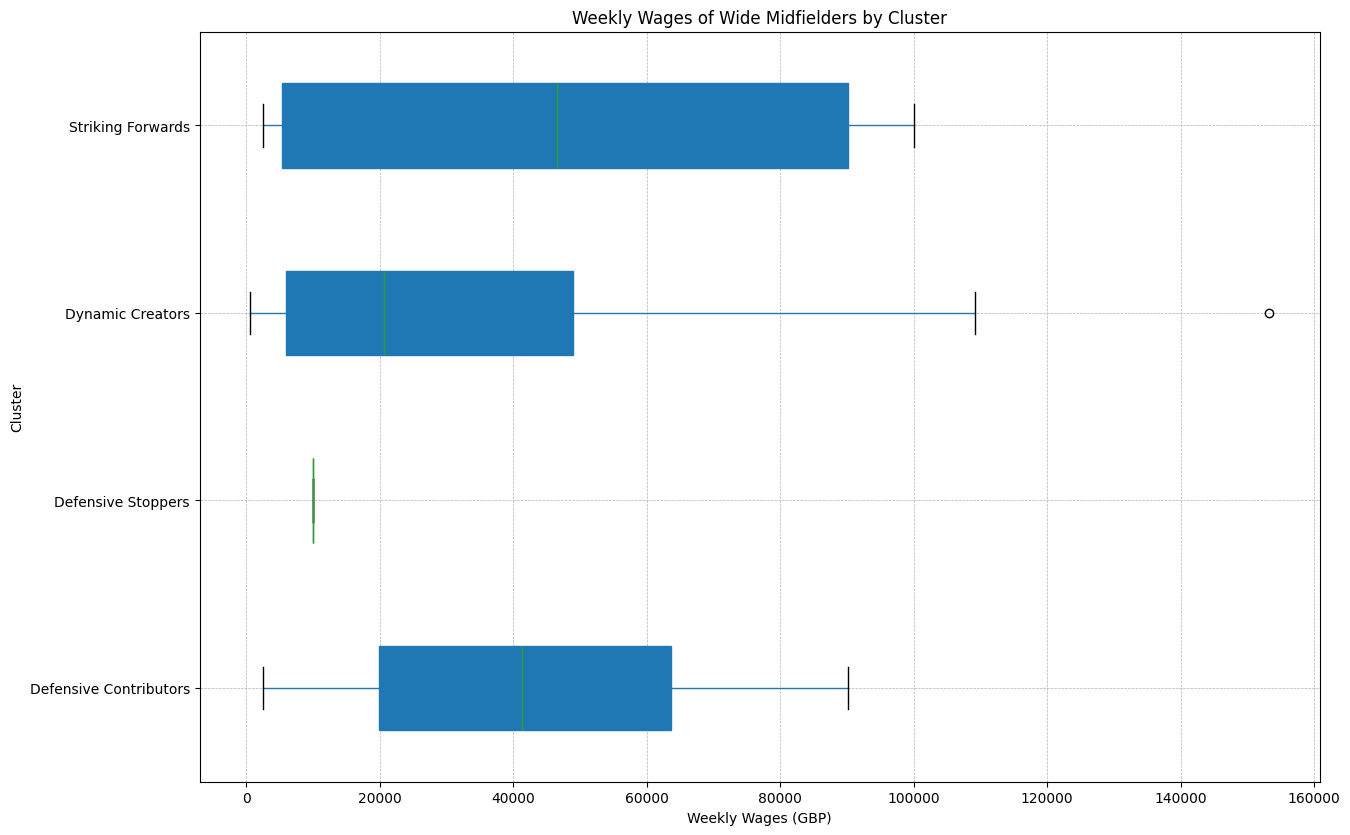

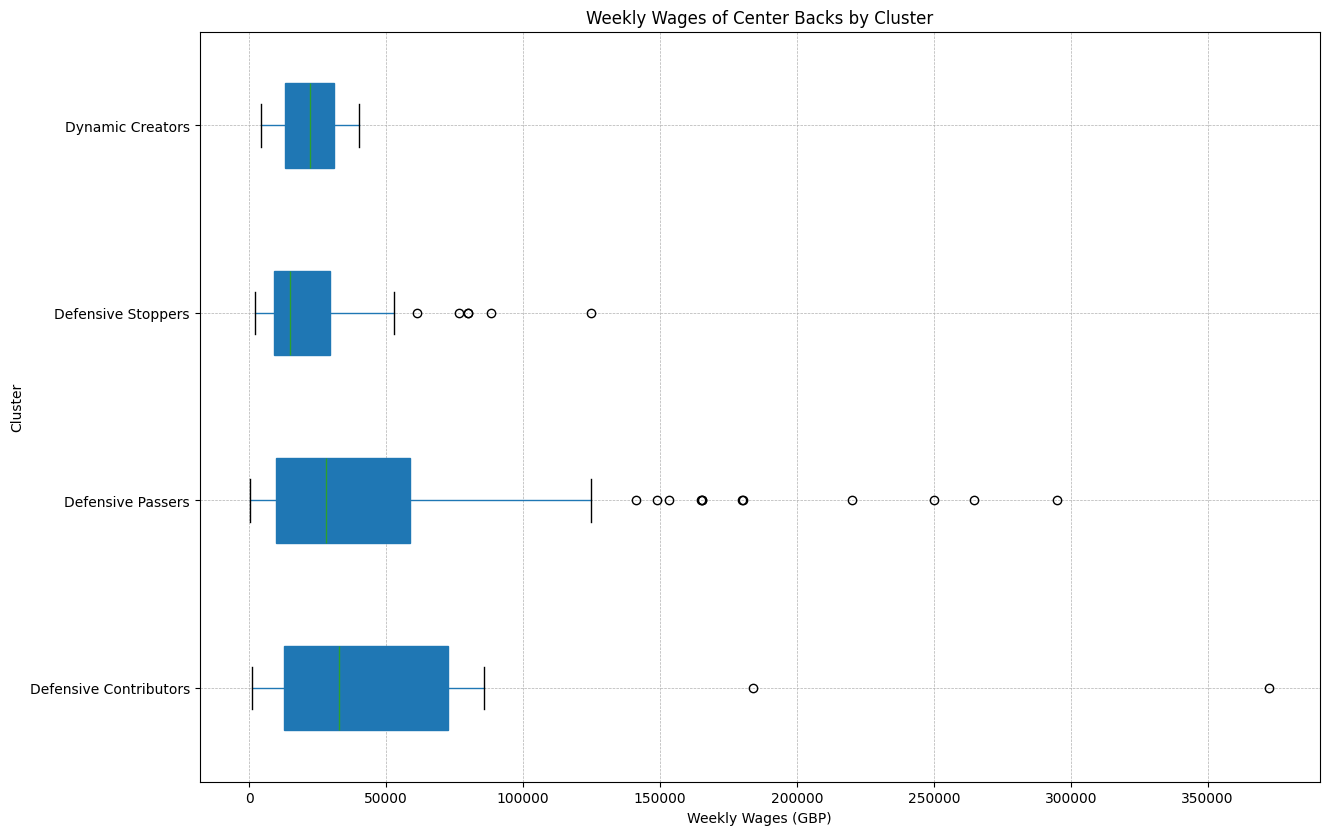

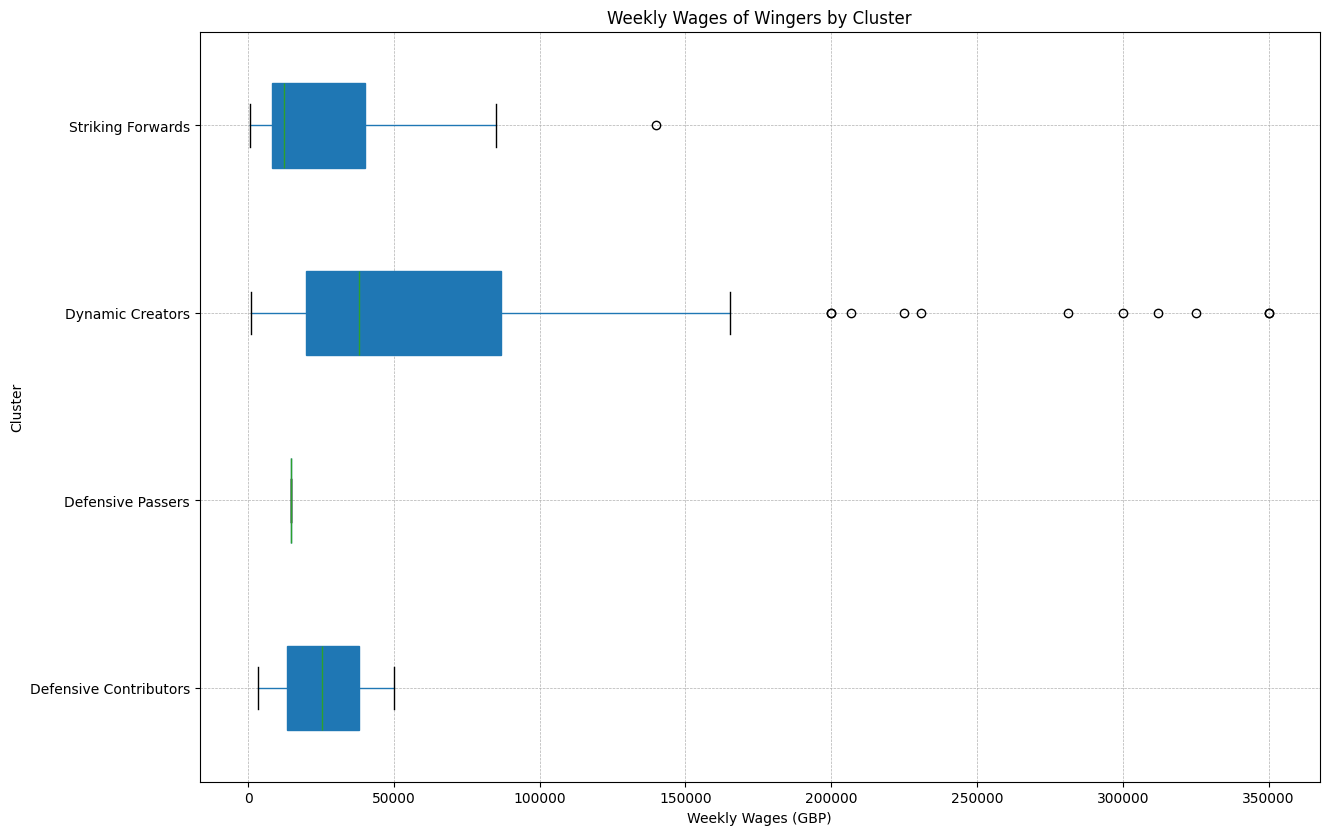

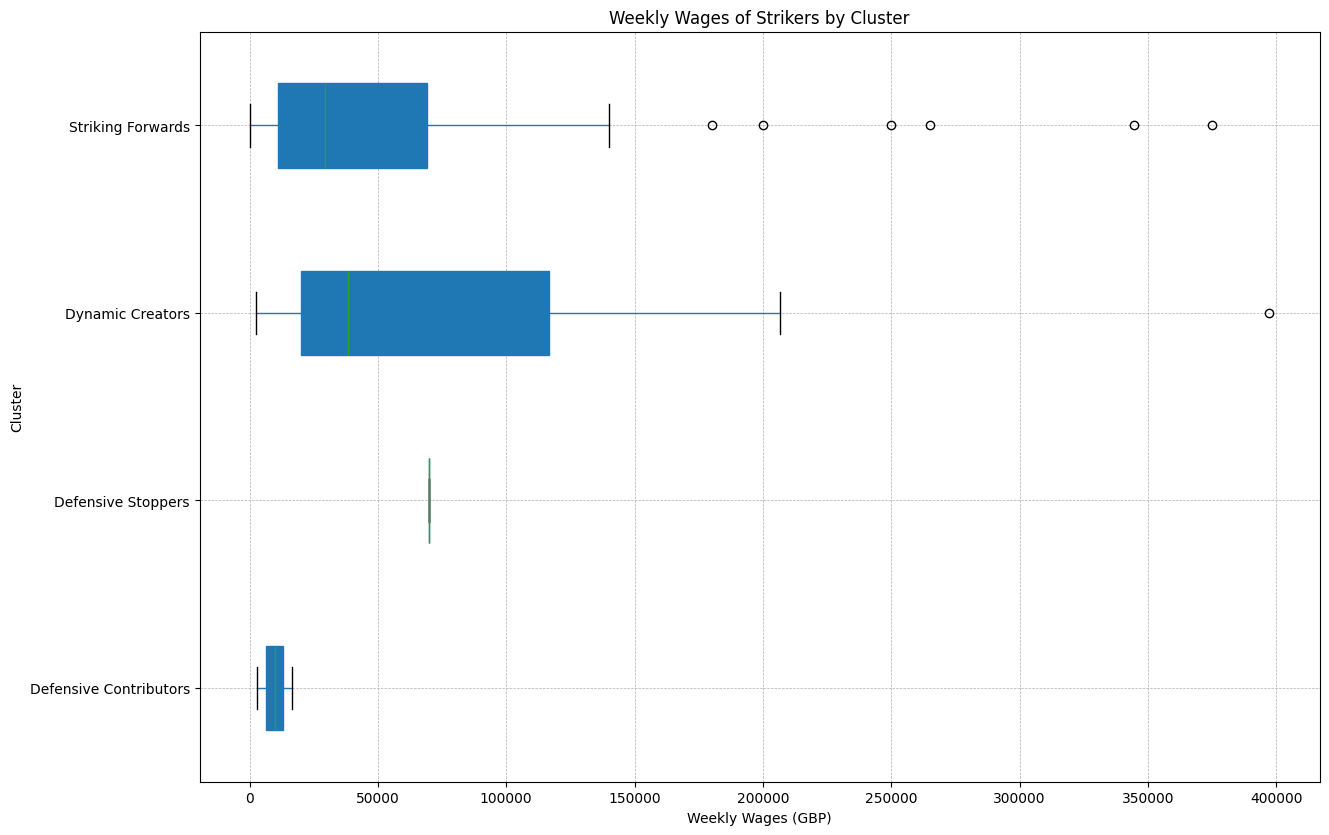

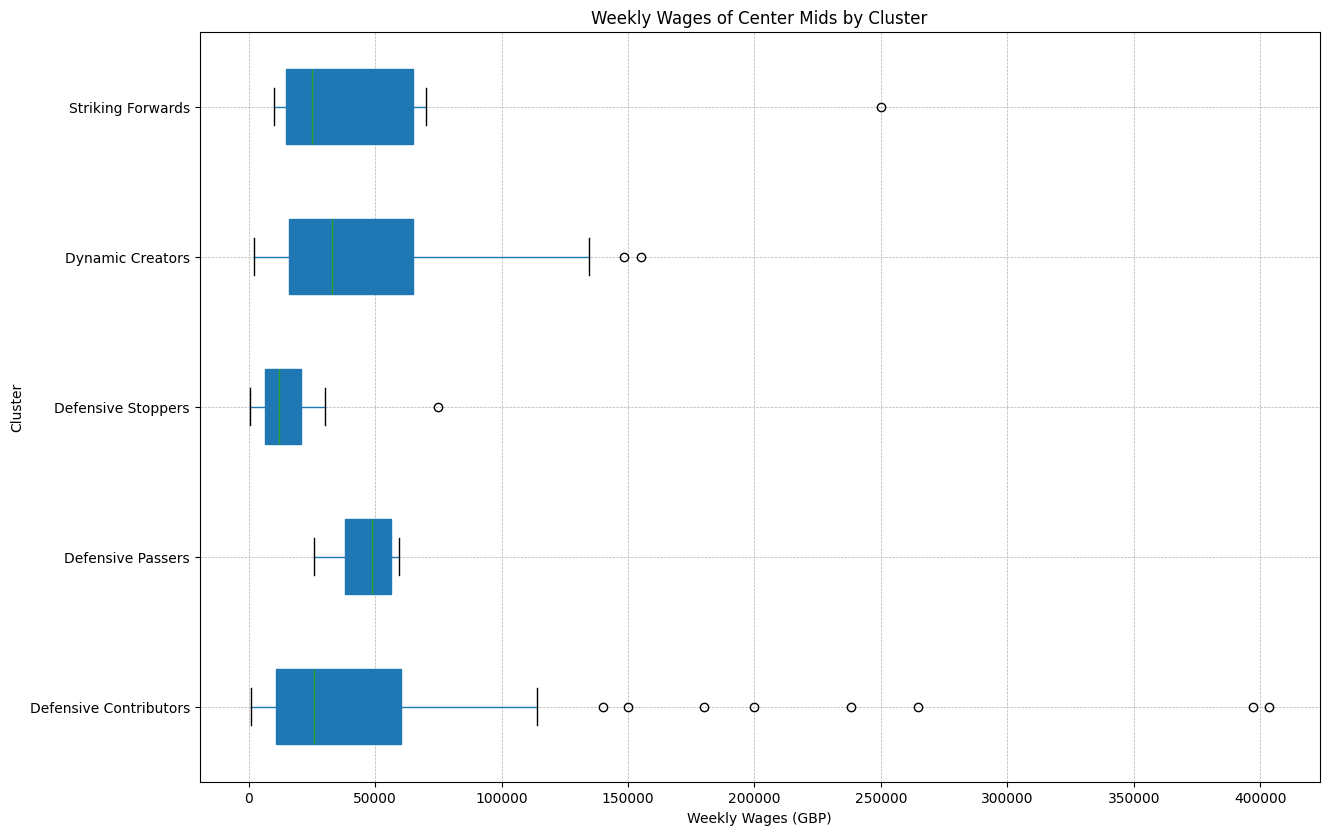

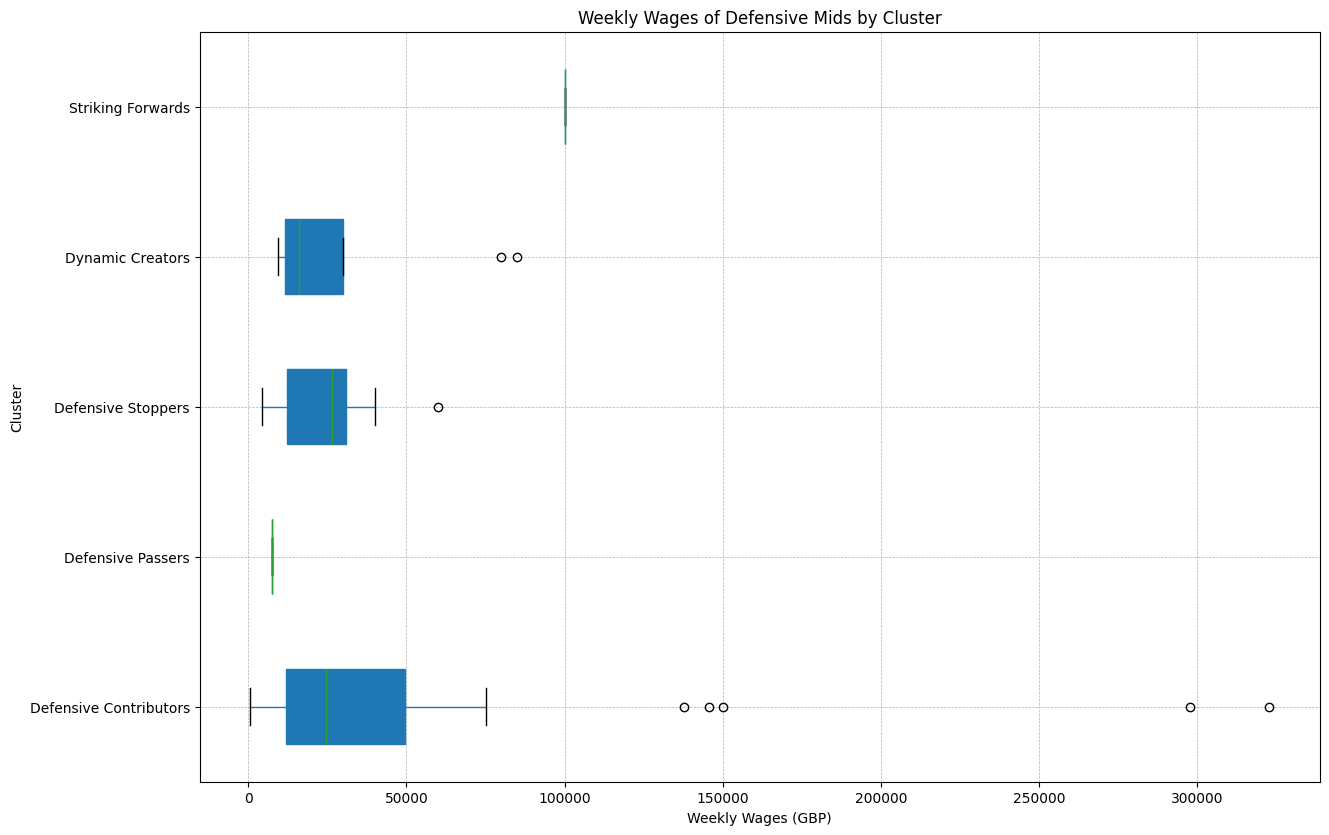

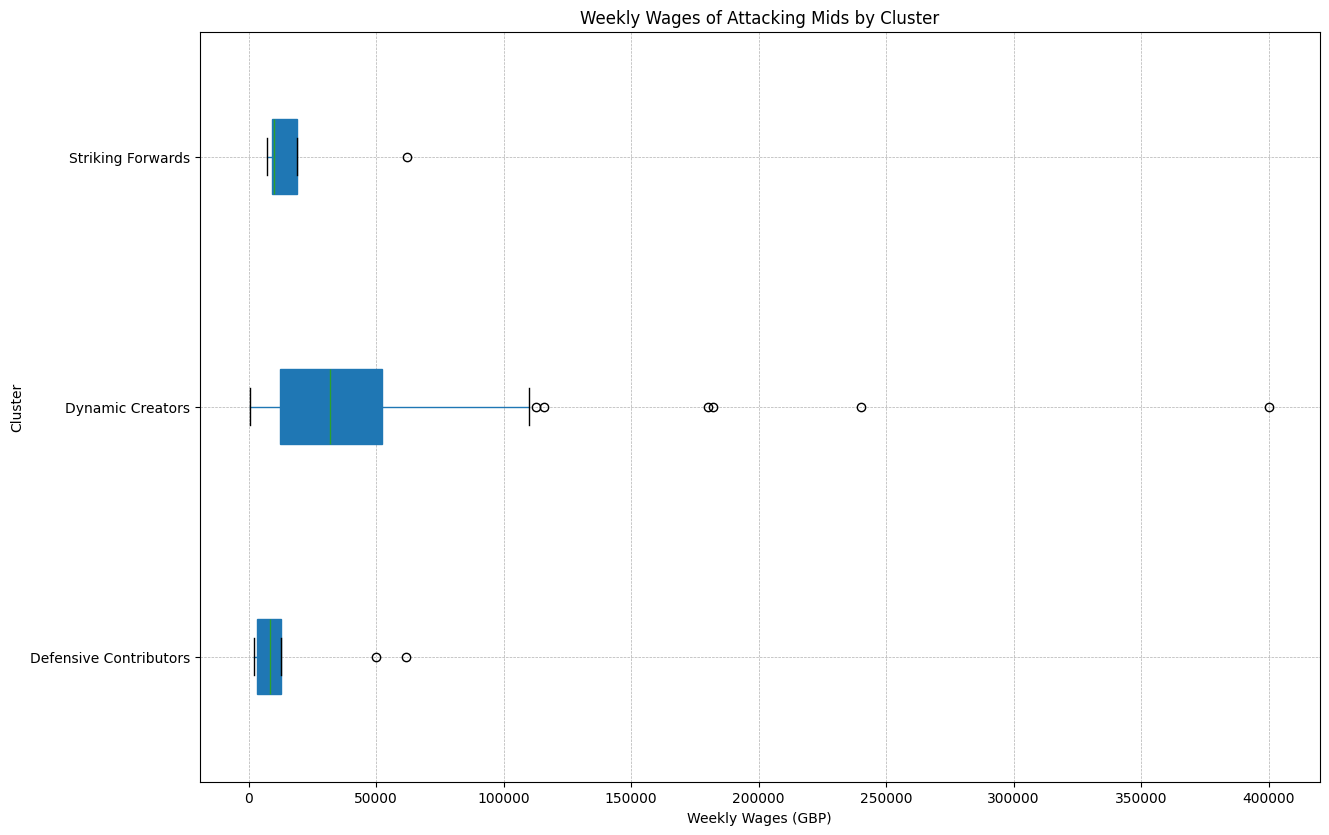

In [37]:
position_groups = [['Right-Back', 'Left-Back'], ['Right Midfielder', 'Left Midfielder'], ['Center-Back'], ['Left Winger', 'Right Winger'], ['Striker'], ['Central Midfielder'], ['Defensive Midfielder'], ['Attacking Midfielder']]
position_group_titles = ['Full Backs', 'Wide Midfielders', 'Center Backs', 'Wingers', 'Strikers', 'Center Mids', 'Defensive Mids', 'Attacking Mids']
position_group_filenames = ['plots/wages/wages_fbs.png', 'plots/wages/wages_wms.png', 'plots/wages/wages_cbs.png', 'plots/wages/wages_wrs.png', 'plots/wages/wages_stks.png', 'plots/wages/wages_cms.png', 'plots/wages/wages_cdms.png', 'plots/wages/wages_cams.png']


for i in range(len(position_groups)):
    plotdata = playerdata_filtered[playerdata_filtered['Position'].isin(position_groups[i])]
    mode = plotdata['Cluster'].mode()[0]
    print(f'Most common cluster for {position_group_titles[i]}: {mode}')
    
    # Set the figure size
    fig, ax = plt.subplots(figsize=(14,10))

    # Create the box and whisker plots
    plotdata.boxplot(column='Weekly Wages', by='Cluster', vert=False, patch_artist=True, ax=ax)

    # Adjust titles and labels
    plt.title(f'Weekly Wages of {position_group_titles[i]} by Cluster')
    plt.suptitle('')
    plt.xlabel('Weekly Wages (GBP)')
    plt.ylabel('Cluster')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.savefig(position_group_filenames[i])

C:\Users\mgurg\AppData\Local\Temp\ipykernel_3484\2223295340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerdata_filtered['log wage'] = np.log(playerdata_filtered['Weekly Wages'])


Most common cluster for Full Backs: Defensive Contributors
Most common cluster for Wide Midfielders: Dynamic Creators
Most common cluster for Center Backs: Defensive Passers
Most common cluster for Wingers: Dynamic Creators
Most common cluster for Strikers: Striking Forwards
Most common cluster for Center Mids: Defensive Contributors
Most common cluster for Defensive Mids: Defensive Contributors
Most common cluster for Attacking Mids: Dynamic Creators


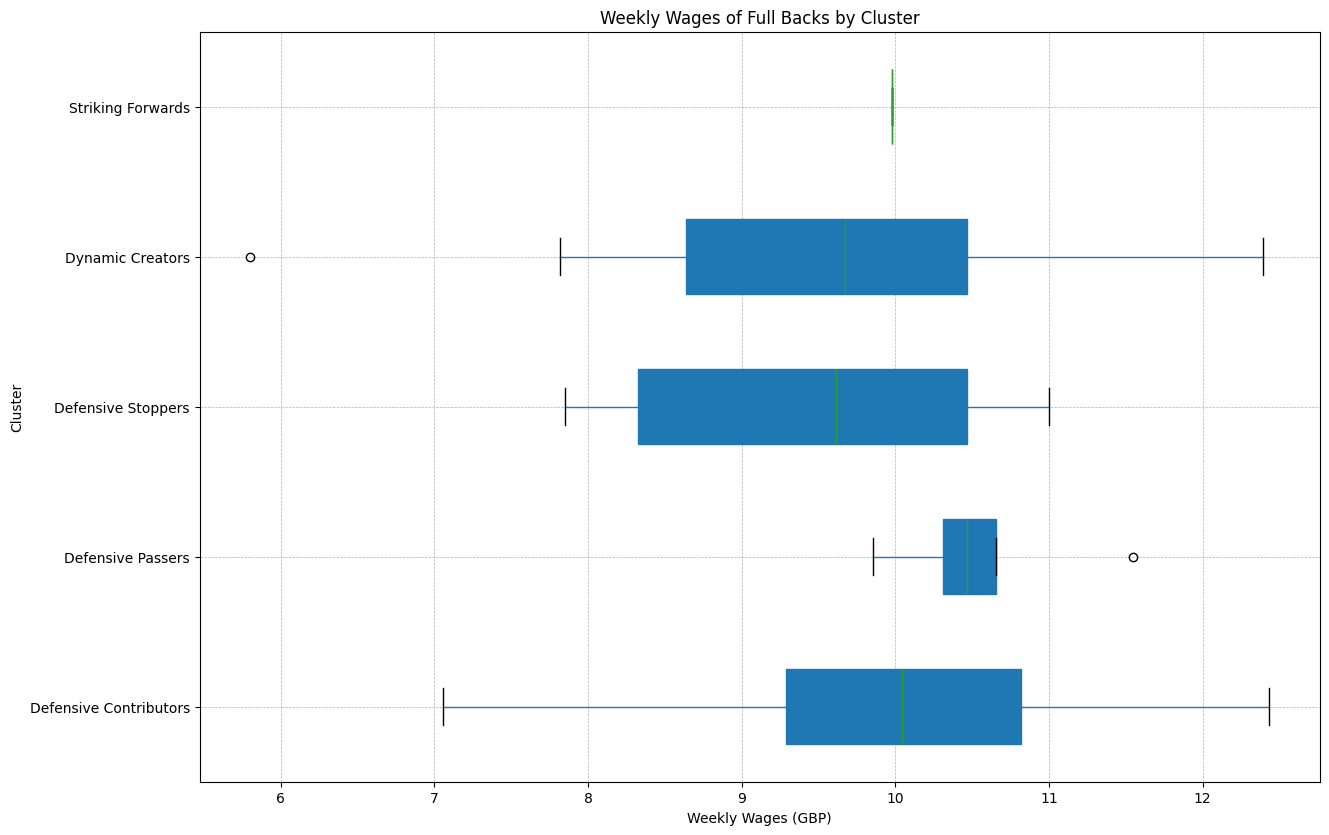

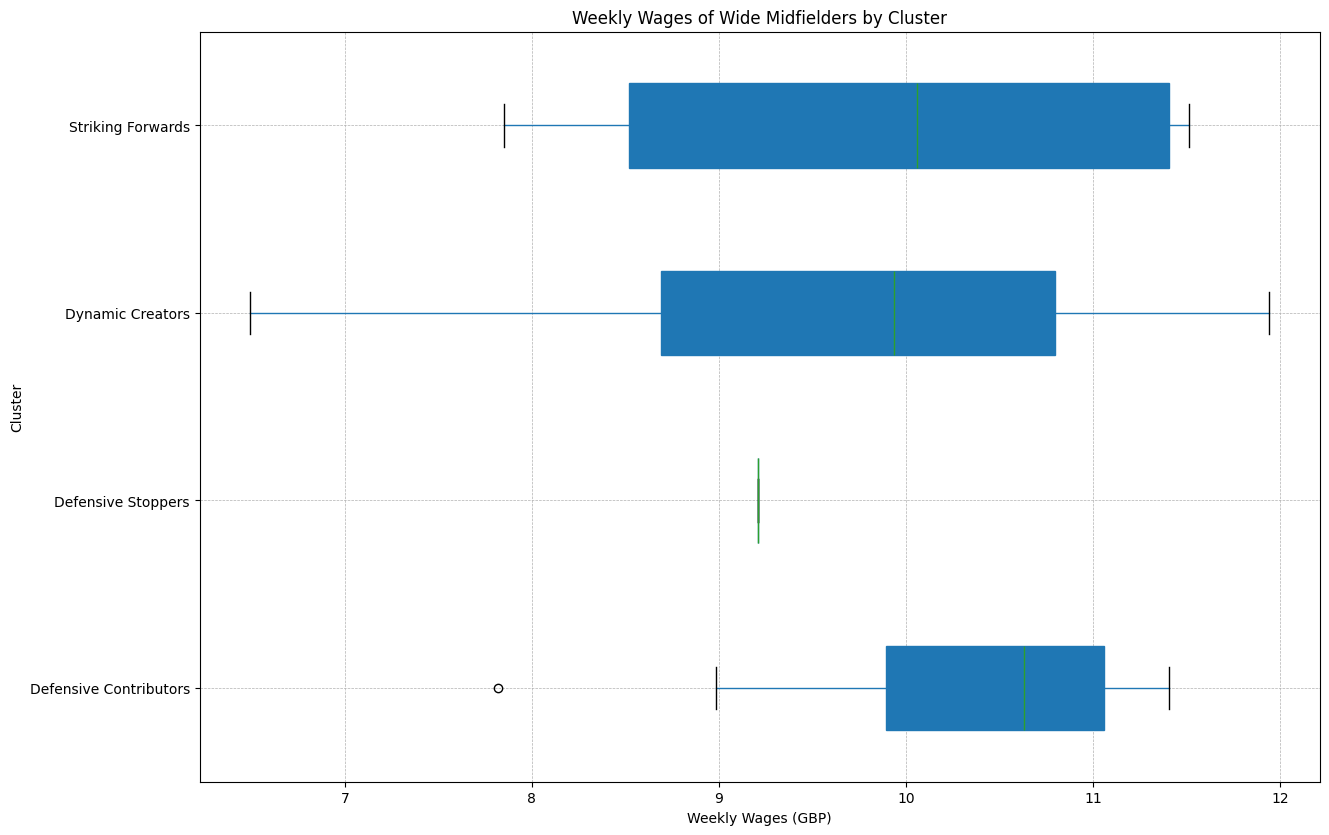

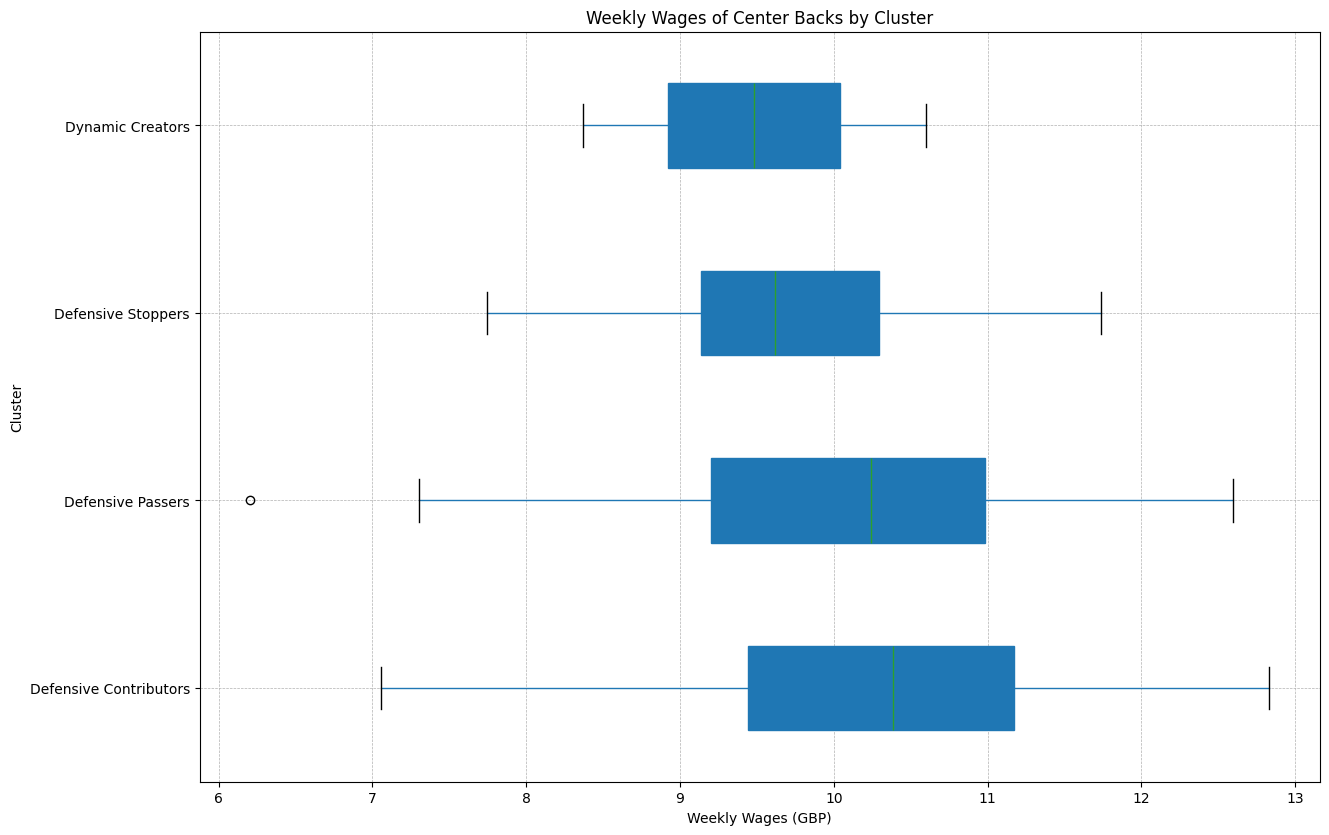

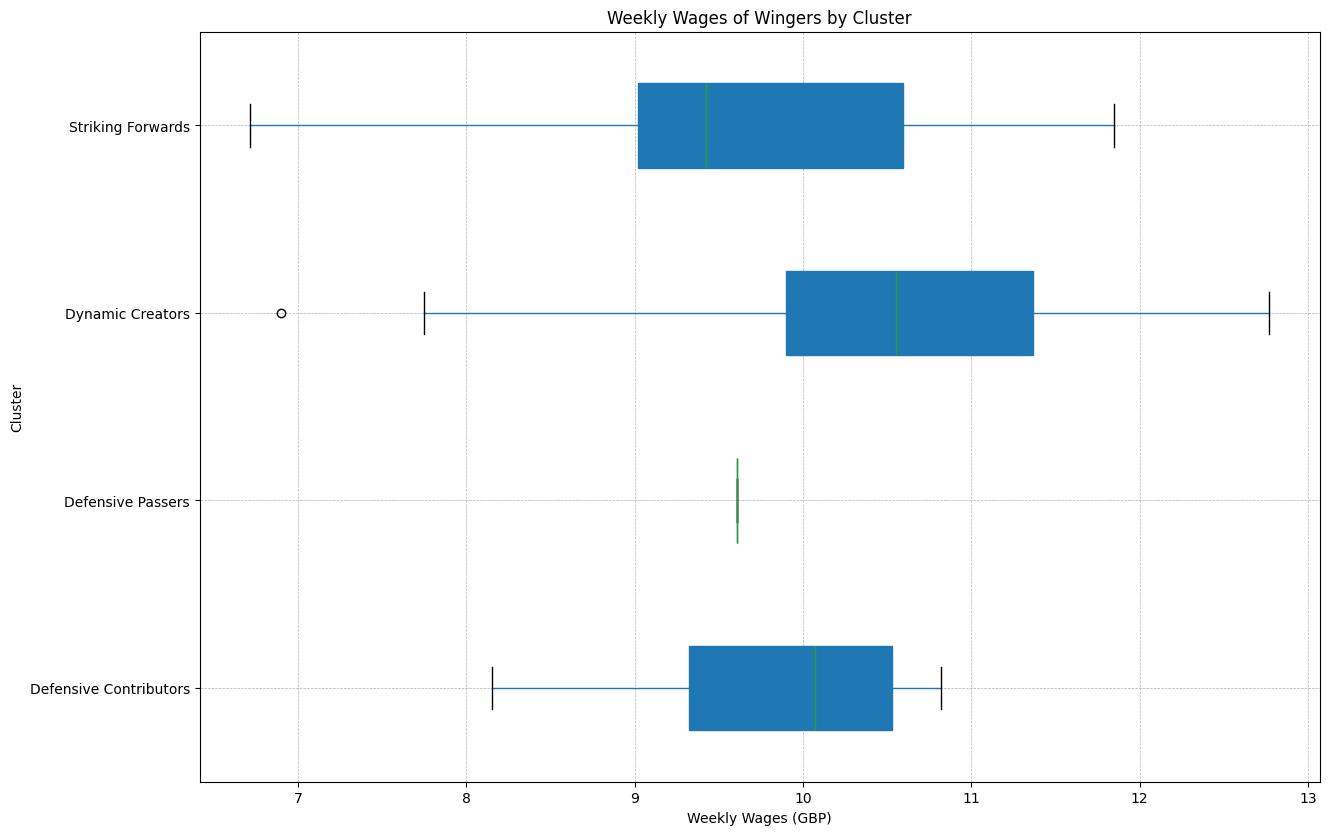

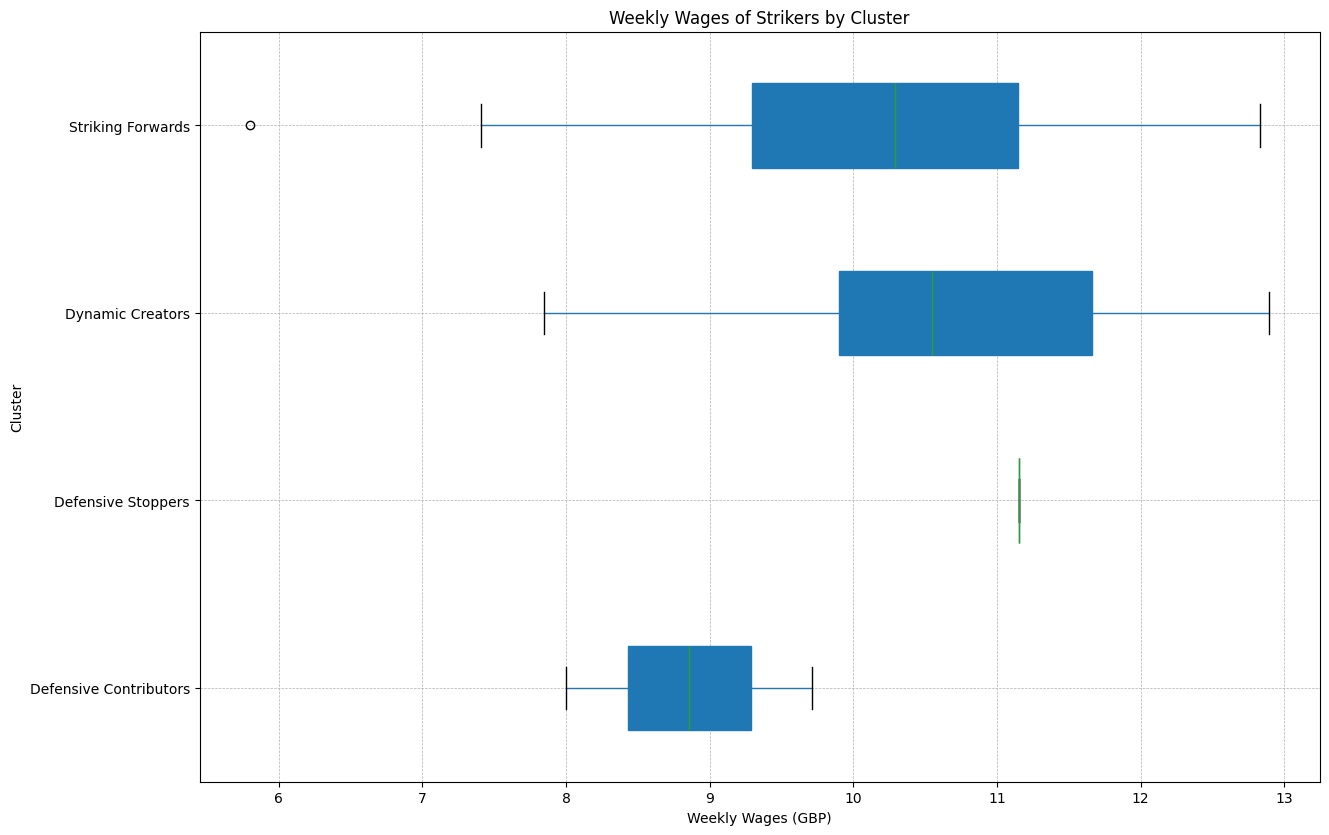

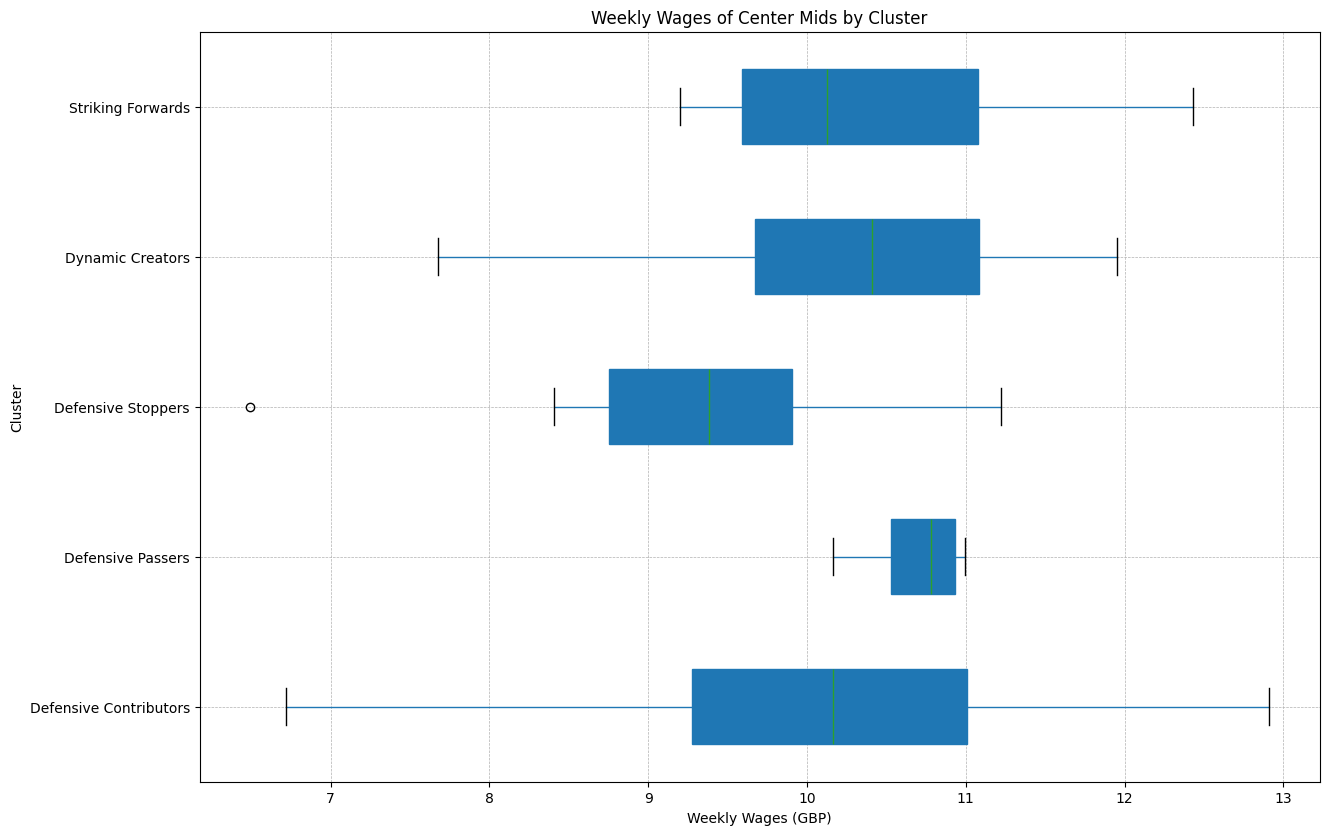

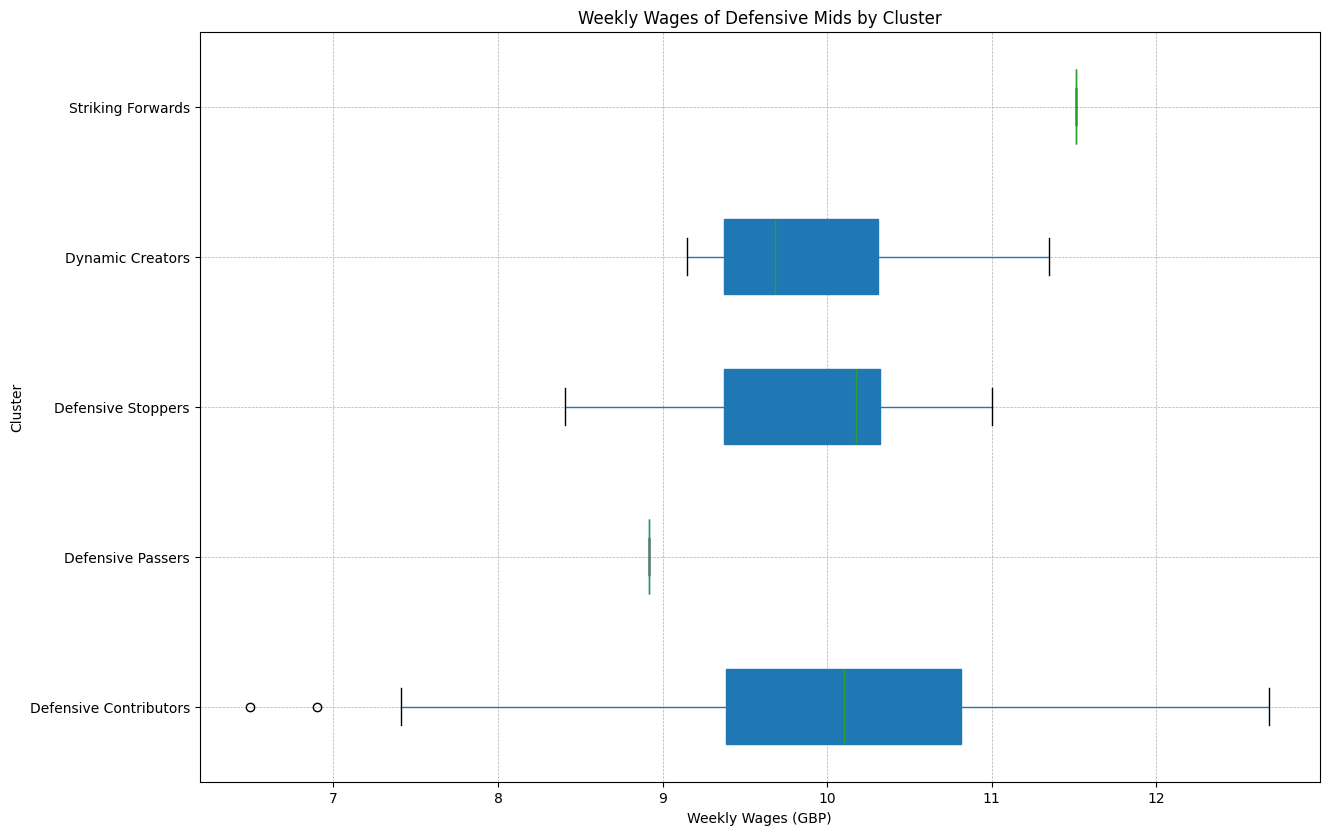

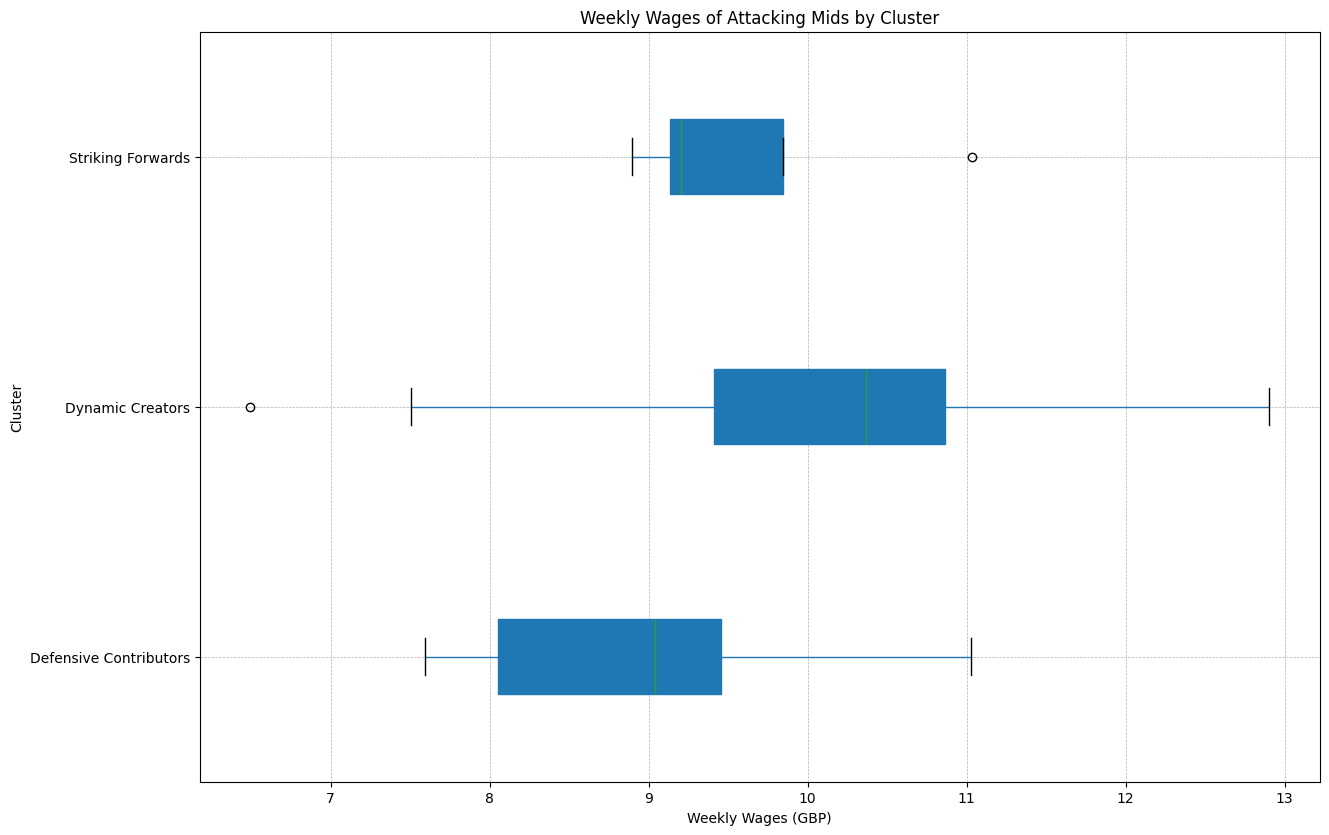

In [38]:
playerdata_filtered['log wage'] = np.log(playerdata_filtered['Weekly Wages'])

for i in range(len(position_groups)):
    plotdata = playerdata_filtered[playerdata_filtered['Position'].isin(position_groups[i])]
    mode = plotdata['Cluster'].mode()[0]
    print(f'Most common cluster for {position_group_titles[i]}: {mode}')
    
    # Set the figure size
    fig, ax = plt.subplots(figsize=(14,10))

    # Create the box and whisker plots
    plotdata.boxplot(column='log wage', by='Cluster', vert=False, patch_artist=True, ax=ax)

    # Adjust titles and labels
    plt.title(f'Weekly Wages of {position_group_titles[i]} by Cluster')
    plt.suptitle('')
    plt.xlabel('Weekly Wages (GBP)')
    plt.ylabel('Cluster')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.savefig(position_group_filenames[i])